# Flight Price Prediction

## Data collection

In [146]:
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [147]:
#importing the data set and printing the first 5 rows
df=pd.read_excel('Data_Train.xlsx')
dff=pd.read_excel('Test_set.xlsx')
print(df.head())
print(dff.head())

       Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0       IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1    Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2  Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3       IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4       IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302

[5 rows x 11 columns]
             Airline Date_of_Journey  ... Total_Stops              Additional_Info
0        Jet Airways       6/06/2019  ...      1 stop                      No info
1             IndiGo      12/05/2019  ...      1 stop                      No info
2        Jet Airways      21/05/2019  ...      1 stop  In-flight meal not included
3  Multiple carriers      21/05/2019  ...      1 stop                      No info
4           Air Asia      24/06/2019  ...    non-stop                      N

I have taken train data as df and test data as dff 

In [148]:
#displaying the bottom 5 rows of the train data set
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [149]:
#displaying the bottom 5 rows of the test data set
dff.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


We can see that the 'Price' is our dependent varialble and all other column are the independent variable 

In [150]:
#displaying the column name
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [151]:
#displaying the column name
dff.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [152]:
#displaying the number of columns and rows of our train and test data set 
print(df.shape)
print(dff.shape)

(10683, 11)
(2671, 10)


In [153]:
#checking the data type of all the variable 
d_type=df.dtypes
d_type

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [154]:
#counting the frequency of each data type 
d_type.value_counts()

object    10
int64      1
dtype: int64

There are 10 variable with object type and 1 variable with integer type

In [155]:
#checking wheather null value is present or not
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see that there are only 2 null value in our data set and we can easily handel it.

In [156]:
#checking wheather null value is present or not in test data set
dff.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [157]:
#displaying the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [158]:
#printing the number of unique element and there count in the catagorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f"----- columnns : {i} -----")
    print(f'Number of Unique element :  {df[i].nunique()}')
    print(f'Count of each unique element :\n{df[i].value_counts()}\n\n\n')

----- columnns : Airline -----
Number of Unique element :  12
Count of each unique element :
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



----- columnns : Date_of_Journey -----
Number of Unique element :  44
Count of each unique element :
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6

In [159]:
#looking for the statistical information of our numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [160]:
#looking for the statistical information of our object column
df.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


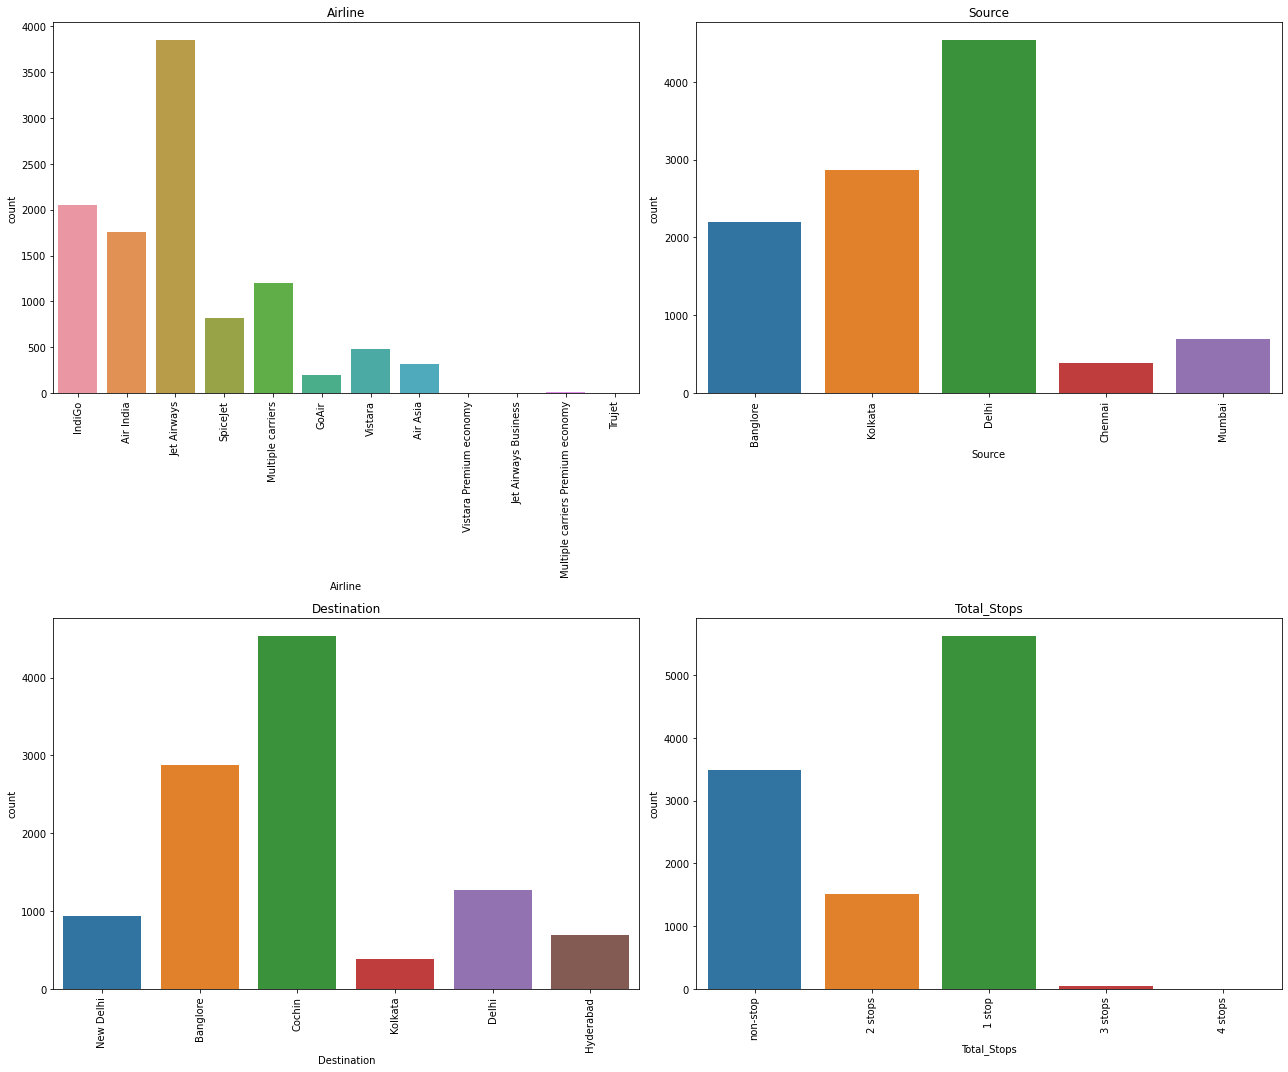

In [167]:
#plotting the count plot for catagorical value
cat_col=['Airline','Source','Destination','Total_Stops']
plt.figure(figsize=(18,15))
for i,col in enumerate(cat_col):
  plt.subplot(2,2,i+1)
  sn.countplot(x=col,data=df)
  plt.title(col)
  plt.xticks(rotation=90)
  plt.tight_layout()

We can see that the count of ject airways, people travelling from delhi, people travelling to cochin, people taking one stop flight are more in count 
 

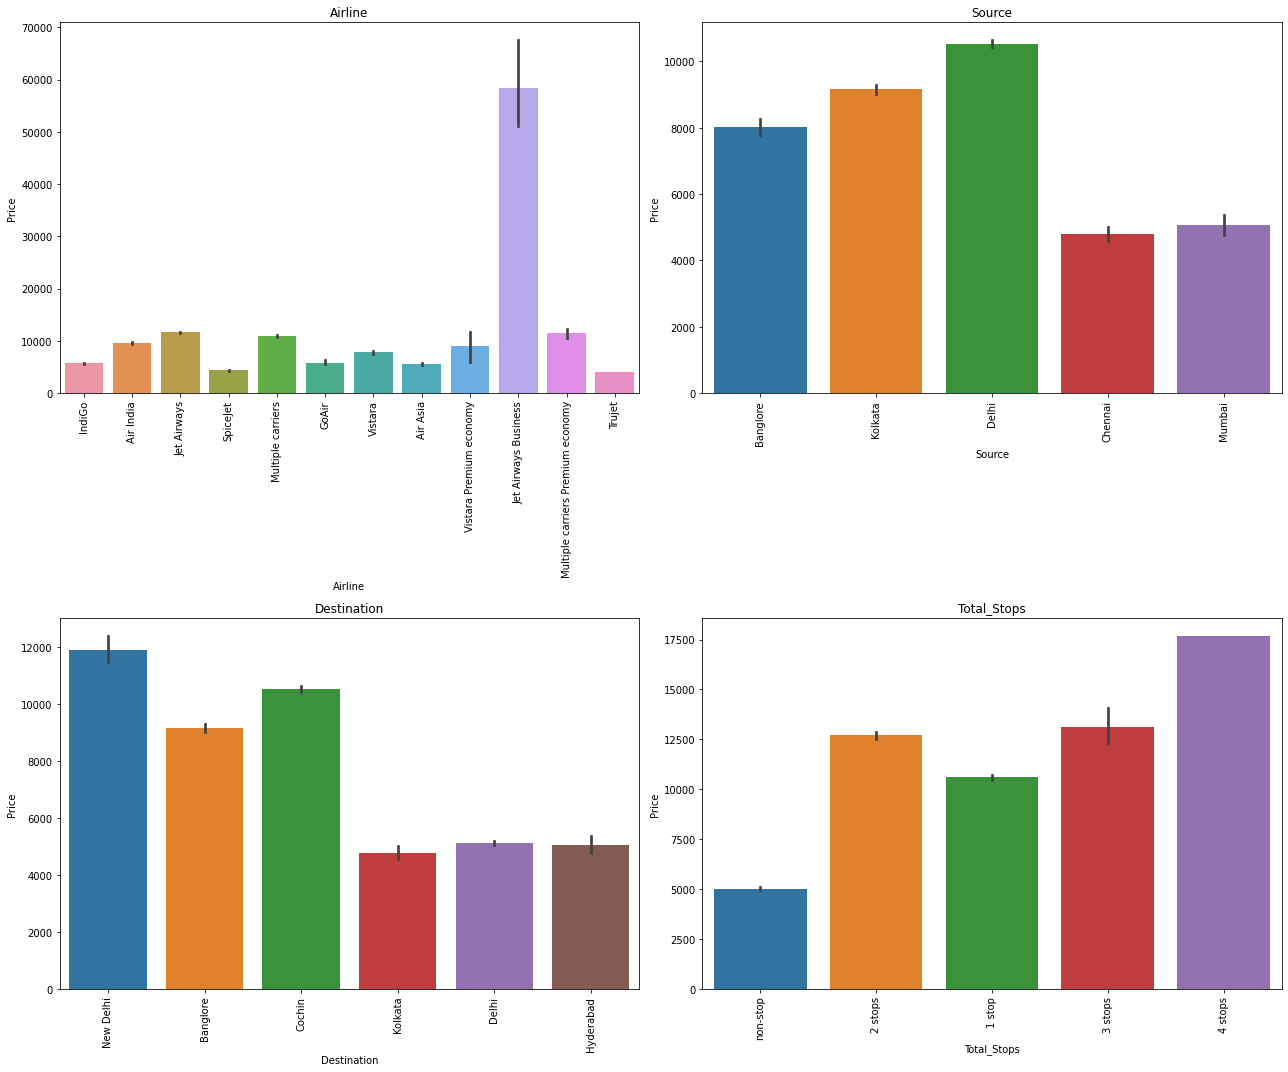

In [168]:
#plotting the count plot for catagorical value
cat_col=['Airline','Source','Destination','Total_Stops']
plt.figure(figsize=(18,15))
for i,col in enumerate(cat_col):
  plt.subplot(2,2,i+1)
  sn.barplot(x=col,y='Price',data=df)
  plt.title(col)
  plt.xticks(rotation=90)
  plt.tight_layout()

The Jet Airlines Business cost is very much high and cost of flight from and to delhi is also hight and 4 stop flight cost more than other and

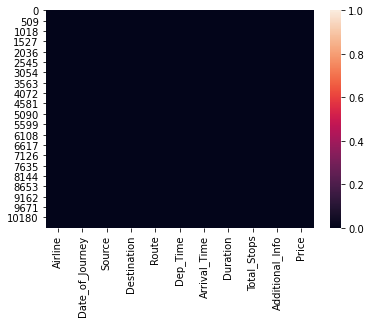

In [169]:
#ploating the heat map to see wheather the null value is present or not
sn.heatmap(df.isnull())

We can see that there are no null value

In [170]:
#seeing correlation of each parameter with label column
dfcor=df.corr()
dfcor

,Price
Price,1.0


# Data cleaning

We would be cleaning both train and test data

In [112]:
#splitting the 'Date_of_Journey'
df['Month']=df['Date_of_Journey'].str.split('/').str[0]
df['Date']=df['Date_of_Journey'].str.split('/').str[1]

In [113]:
dff['Month']=dff['Date_of_Journey'].str.split('/').str[0]
dff['Date']=dff['Date_of_Journey'].str.split('/').str[1]

In [114]:
#droping the 'Date_of_Journey'
df.drop('Date_of_Journey',axis=1,inplace=True)

In [115]:
dff.drop('Date_of_Journey',axis=1,inplace=True)

We have extracted date and month from 'Date of Journey' column and we are droping the 'Date_of_Journey' from both train and test data

In [116]:
#droping the 'Route'
df.drop('Route',axis=1,inplace=True)

In [117]:
dff.drop('Route',axis=1,inplace=True)

In [118]:
#droping the 'Additional_Info'
df.drop('Additional_Info',axis=1,inplace=True)

In [119]:
dff.drop('Additional_Info',axis=1,inplace=True)

We have droped the Route as we have got most of the infromation from other column and we have also droped the additional information as there are lot of null values.

In [120]:
#splitting the Arrival_Time
df['Arrival_Time']= df['Arrival_Time'].str.split().str[0]

In [121]:
dff['Arrival_Time']= df['Arrival_Time'].str.split().str[0]

We have extracted the time from that column and we have removed all unwanted inputs present in our data set

In [122]:
#Displaying the rows with null value 
df[df.isna().any(axis=1)]

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Date
9039,Air India,Delhi,Cochin,09:45,09:25,23h 40m,NaN,7480,6,05


In [123]:
#spliting the 'Duration' column
df['Duration']=df['Duration'].str.split()

In [124]:
dff['Duration']=dff['Duration'].str.split()

In [125]:
#storing the hours seperately
hour=[]
time=list(df['Duration'])
for i in range(len(time)):
  for j in range(len(time[i])):
    if j == 0:
      if 'h' in time[i][j]:
        hour.append(time[i][j])
      else:
        hour.append('0h')

In [126]:
hours=[]
time=list(dff['Duration'])
for i in range(len(time)):
  for j in range(len(time[i])):
    if j == 0:
      if 'h' in time[i][j]:
        hours.append(time[i][j])
      else:
        hours.append('0h')

In [127]:
#storing the hours seperately
min=[]
time=list(df['Duration'])
for i in range(len(time)):
  if len(time[i]) == 2:
    min.append(time[i][-1])
  else:
    min.append('0m')

In [128]:
mins=[]
time=list(dff['Duration'])
for i in range(len(time)):
  if len(time[i]) == 2:
    mins.append(time[i][-1])
  else:
    mins.append('0m')

In [129]:
#extracting the numerical value from the 'duration' column
df['Dur_hours']=hour
df['Dur_minutes']=min
df['Dur_hours']=df['Dur_hours'].str.split('h').str[0]
df['Dur_minutes']=df['Dur_minutes'].str.split('m').str[0]

In [130]:
dff['Dur_hours']=hours
dff['Dur_minutes']=mins
dff['Dur_hours']=dff['Dur_hours'].str.split('h').str[0]
dff['Dur_minutes']=dff['Dur_minutes'].str.split('m').str[0]

In [131]:
#converting 'Duration' into numerical
df['Dur_hours']=df['Dur_hours'].astype(int)
df['Dur_minutes']=df['Dur_minutes'].astype(int)

In [132]:
dff['Dur_hours']=dff['Dur_hours'].astype(int)
dff['Dur_minutes']=dff['Dur_minutes'].astype(int)

In [133]:
#coverting the minutes into hours 
df['Dur_minutes']=df['Dur_minutes']/60
df['Dur_hours']=df['Dur_hours']+df['Dur_minutes']
df.drop('Dur_minutes',axis=1,inplace=True)
df.drop('Duration',axis=1,inplace=True)

In [134]:
dff['Dur_minutes']=dff['Dur_minutes']/60
dff['Dur_hours']=dff['Dur_hours']+dff['Dur_minutes']
dff.drop('Dur_minutes',axis=1,inplace=True)
dff.drop('Duration',axis=1,inplace=True)

In [135]:
#droping the rows with null values 
df=df.dropna(axis=0)

Here I have extracted the hour and minutes separately and converted minutes into hours and the I have stored this value in separate column

In [136]:
#splitting the Dep_Time 
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[-1]
df.drop('Dep_Time',axis=1,inplace=True)

In [137]:
dff['Dep_hour']=dff['Dep_Time'].str.split(':').str[0]
dff['Dep_min']=dff['Dep_Time'].str.split(':').str[-1]
dff.drop('Dep_Time',axis=1,inplace=True)

I have splitted the Dep_Time and stored the hours and Min separately

In [138]:
#splitting the Arr_Time
df['Arr_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arr_min']=df['Arrival_Time'].str.split(':').str[-1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [139]:
dff['Arr_hour']=dff['Arrival_Time'].str.split(':').str[0]
dff['Arr_min']=dff['Arrival_Time'].str.split(':').str[-1]
dff.drop('Arrival_Time',axis=1,inplace=True)

I have splitted the Arr_hour and stored the hours and Min separately

In [140]:
#convertin into int data type
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)
df['Arr_hour']=df['Arr_hour'].astype(int)
df['Arr_min']=df['Arr_min'].astype(int)

In [141]:
dff['Dep_hour']=dff['Dep_hour'].astype(int)
dff['Dep_min']=dff['Dep_min'].astype(int)
dff['Arr_hour']=dff['Arr_hour'].astype(int)
dff['Arr_min']=dff['Arr_min'].astype(int)

In [142]:
df['Month']=df['Month'].astype(int)
df['Date']=df['Date'].astype(int)

In [143]:
dff['Month']=dff['Month'].astype(int)
dff['Date']=dff['Date'].astype(int)

I have converted the data into integer type

In [144]:
#replacing the values in Total_Stops
df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [145]:
dff['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [ ]:
#applying the label encoder on 3 columns
col=['Airline','Source','Destination']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in col:
  df[i]=LE.fit_transform(df[i])

In [ ]:
col=['Airline','Source','Destination']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in col:
  dff[i]=LE.fit_transform(dff[i])

In [ ]:
#copying for the emergency
df1=df.copy()

In [ ]:
#removing outlier by z score method
from scipy.stats import zscore
z=np.abs(zscore(df1))
df1=df1[(z<3).all(axis=1)]
print("Before removing outliers::",df.shape)
print("After removing outliers::",df1.shape)
p=100-(len(df1.index)/len(df.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers:: (10682, 12)
After removing outliers:: (10488, 12)
We are lossing 1.8161392997565997 % of data.


In [ ]:
#Creating the dependent and independent variable 
x=df1.drop('Price',axis=1)
y=df1['Price']

In [ ]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [ ]:
dff=power_transform(dff,method='yeo-johnson')

In [ ]:
#applying standard scaling method on X variable 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
dff=ss.fit_transform(dff)

# Model building 

In [ ]:
#importing the library for model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

In [ ]:
#selecting the best random state
from sklearn.ensemble import RandomForestRegressor

mA=0
mRS=0
for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
  mod=RandomForestRegressor()
  mod.fit(x_train,y_train)
  pred=mod.predict(x_test)
  r2=r2_score(y_test,pred)
  if r2>mA:
    mA=r2
    mRS=i
print('Best accuracy is ',mA,' on random state ',mRS)

Best accuracy is  0.8283358867678141  on random state  7


In [ ]:
#building the model using LinearRegression, RandomForestRegressor, DecissionTreeRegressor, svrkernal, Lasso
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
#spliting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)

In [ ]:
#building model 
model={LinearRegression():"LinearRegression", DecisionTreeRegressor():'DecisionTreeRegressor', RandomForestRegressor():'RandomForestRegressor', Lasso():'Lasso'}
r2score=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  r2=r2_score(y_test,pred)
  print("R2 Score / Accuracy Score is ",r2)
  r2score.append(r2)
  cvv = KFold(n_splits=10, shuffle=True)
  c=cross_val_score(key,x,y,cv=cvv,scoring='r2')
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  mse=mean_squared_error(y_test,pred)
  print('Mean Squared Error',mse)
  mae=mean_absolute_error(y_test,pred)
  print('Mean Absolute Error',mae)
  print('\n\n\n')

=====  LinearRegression  model ===== 
R2 Score / Accuracy Score is  0.5573605222705897
Cross validation score is 0.5334199142019183 

Mean Squared Error 7276516.568955463
Mean Absolute Error 2155.180222539109




=====  DecisionTreeRegressor  model ===== 
R2 Score / Accuracy Score is  0.723386296028621
Cross validation score is 0.7049000005176358 

Mean Squared Error 4547231.55393364
Mean Absolute Error 1297.6393549412137




=====  RandomForestRegressor  model ===== 
R2 Score / Accuracy Score is  0.8258329091798471
Cross validation score is 0.8057266644025234 

Mean Squared Error 2863119.504434135
Mean Absolute Error 1110.9402289789837




=====  Lasso  model ===== 
R2 Score / Accuracy Score is  0.5573829122037314
Cross validation score is 0.5332819104879716 

Mean Squared Error 7276148.502554522
Mean Absolute Error 2154.9457524037025






In [ ]:
#selecting the best model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor','Lasso']
Modelselection['R2 Score']=r2score
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of R2 and Cross_Val']=(Modelselection['R2 Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,R2 Score,Cross Validation,Diff of R2 and Cross_Val
0,LinearRegression,0.557361,0.533420,0.023941
1,DecisionTreeRegressor,0.723386,0.704900,0.018486
2,RandomForestRegressor,0.825833,0.805727,0.020106
3,Lasso,0.557383,0.533282,0.024101


We have got the RandomForestRegressor with **82%** accuracy with 2% variance. So, Lets do hyper parameter tuning on it

In [ ]:
#hyper parameter tunning for RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

p1={'max_features':['sqrt'],'criterion': ['mse','mae'],'max_depth':np.arange(2,5)}
p2={'oob_score':['True'],'bootstrap':['False','True'],'max_leaf_nodes':[2,3,4]}
p=[p1,p2]

for i in p:
  r_f=RandomForestRegressor()
  clf=GridSearchCV(r_f,i)
  clf.fit(x_train,y_train)
  print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'sqrt'}
{'bootstrap': 'False', 'max_leaf_nodes': 4, 'oob_score': 'True'}


In [ ]:
model_1=RandomForestRegressor(criterion='mse', max_depth=4, max_features='sqrt')
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(model_1,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.6652726301106041
Cross validation score is 0.6378414995317774 

Mean Squared Error 5502557.669679903
Mean Absolute Error 1839.876278480665


In [ ]:
model_2=RandomForestRegressor(bootstrap=True, max_leaf_nodes=4, oob_score=True)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(model_2,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.591672489762249
Cross validation score is 0.561757047307829 

Mean Squared Error 6712464.755847312
Mean Absolute Error 2011.142842475336


In [ ]:
#final model
fin_mod=RandomForestRegressor()
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)
r2=r2_score(y_test,pred)
print("R2 Score / Accuracy Score is ",r2)
cvv = KFold(n_splits=10, shuffle=True)
c=cross_val_score(fin_mod,x,y,cv=cvv,scoring='r2')
print('Cross validation score is',(np.abs(c)).mean(),'\n')
mse=mean_squared_error(y_test,pred)
print('Mean Squared Error',mse)
mae=mean_absolute_error(y_test,pred)
print('Mean Absolute Error',mae)

R2 Score / Accuracy Score is  0.8246451538326635
Cross validation score is 0.8058542296955599 

Mean Squared Error 2882644.923874764
Mean Absolute Error 1110.875109475698


After hyper parameter we can see that there is no such improvenment So saving the RandomForestRegressor base modle

We have Final modle with **82%** with 2% deviation

In [ ]:
#MODEL SAVING
import joblib
joblib.dump(fin_mod,'FinalModel.pk1')

['FinalModel.pk1']

## Lets predict our test data

In [ ]:
#Predicting the value
x_test=dff
y_pred=fin_mod.predict(x_test)

In [ ]:
#Displaying the predicted values 
y_pred

array([11193.08      ,  4529.27      , 13197.28916667, ...,
       15399.52333333, 12664.55      ,  9321.27      ])

In [ ]:
#Storing the predicted values in dataframe
predicted_data=pd.DataFrame({'Predicted_Price':y_pred})
predicted_data

,Predicted_Price
0,11193.080000
1,4529.270000
2,13197.289167
3,10709.828571
4,4051.180000
...,...
2666,8092.490000
2667,4974.160000
2668,15399.523333
2669,12664.550000


In [ ]:
#Saving the predicted data frame
predicted_data.to_csv("Predicted_Price.csv",index=False)